In [1]:
# Principal Component Analysis
# Full name: Mai Xuan Bach
# Number in list: 7
# ID: 11200489

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets

In [4]:
from numpy.linalg import eigh

# 1. Tự biến đổi lại toán thuật toán PCA 
In pdf file

# 2. Implement thuật toán PCA bằng numpy

In [5]:
class PrincipalComponent:
    def __init__(self, n):
        self._n_components = n # number of principal components
    
    def fit(self, X, y):
        self._original_X = X
        self._D = X.shape[1] # dimension of X
        self._X = X
        self._y = y
        
        # Scale mean of each column of X into 0
        self._X_trans = self._X - np.mean(self._X, axis = 0)
        
        # Define S (Covariance matrix)
        S = np.cov(self._X_trans, rowvar = False)
        
        # Find eigenvalues (w), eigenvetors (v)
        self._w, self._v = eigh(S)
        
        # Sort the eigenvalues (w) in descending order, then reorder the eigenvectors (v) according to sorted w
        idx = np.argsort(self._w)[::-1]
        self._v = self._v[:,idx]
        self._w = self._w[idx]
        
        # Projection matrix
        self._projection_matrix = (self._v.T[:][:self._n_components]).T
        
        return self
    
    def transform(self):
        # Calculate Z - the principal components matrix (X_PCA): Z = X.B
        self._X_PCA = self._X_trans.dot(self._projection_matrix)
        return self._X_PCA
    
    def fit_transform(self, X, y):
        self.fit(X, y)
        self.transform()
        return self._X_PCA
    
    def explained_variance(self):
        # Calculate explained variance
        variance_explained = []
        for i in self._w:
            variance_explained.append((i/sum(self._w))*100)
        print("Explained variance:", variance_explained)
        
        # Visualize explained variance at each dimension
        with plt.style.context('ggplot'):
            plt.figure(figsize=(6, 4))
        plt.bar(range(self._D), variance_explained, alpha=0.5, align='center',
                    label='individual explained variance')
        plt.xticks(np.arange(0, self._D, step=1), [i for i in range(1, self._D + 1)])
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal components')
        plt.legend()
        plt.tight_layout()
        
    def visualize_2_dim(self):
        # Create dataframe of principal components and Y
        df = pd.DataFrame(self._X_PCA, columns = ["Principal Component 1", "Principal Component 2"])
        df["target"] = self._y
        
        # Visualize
        fig = plt.figure(figsize = (8,8))
        ax = fig.add_subplot(1,1,1) 
        
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title('2 component PCA', fontsize = 20)
        
        targets = [0, 1, 2]
        legends = ["setosa", "versicolor", "virginica"]
        colors = ['r', 'g', 'b']
        
        for target, color in zip(targets,colors):
            indicesToKeep = df['target'] == target
            ax.scatter(df.loc[indicesToKeep, 'Principal Component 1']
                       , df.loc[indicesToKeep, 'Principal Component 2']
                       , c = color
                       , s = 50)
            
        ax.legend(legends)
        ax.grid()
        plt.show()
        

# 3.	Dùng thuật toán ở bài 2, giảm dữ liệu iris về 2 chiều, https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html


In [6]:
# Load dataset
iris = datasets.load_iris()
X = iris.data  
y = iris.target

In [7]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
PCA = PrincipalComponent(2)

In [10]:
PCA.fit_transform(X, y)

array([[ 2.68412563,  0.31939725],
       [ 2.71414169, -0.17700123],
       [ 2.88899057, -0.14494943],
       [ 2.74534286, -0.31829898],
       [ 2.72871654,  0.32675451],
       [ 2.28085963,  0.74133045],
       [ 2.82053775, -0.08946138],
       [ 2.62614497,  0.16338496],
       [ 2.88638273, -0.57831175],
       [ 2.6727558 , -0.11377425],
       [ 2.50694709,  0.6450689 ],
       [ 2.61275523,  0.01472994],
       [ 2.78610927, -0.235112  ],
       [ 3.22380374, -0.51139459],
       [ 2.64475039,  1.17876464],
       [ 2.38603903,  1.33806233],
       [ 2.62352788,  0.81067951],
       [ 2.64829671,  0.31184914],
       [ 2.19982032,  0.87283904],
       [ 2.5879864 ,  0.51356031],
       [ 2.31025622,  0.39134594],
       [ 2.54370523,  0.43299606],
       [ 3.21593942,  0.13346807],
       [ 2.30273318,  0.09870885],
       [ 2.35575405, -0.03728186],
       [ 2.50666891, -0.14601688],
       [ 2.46882007,  0.13095149],
       [ 2.56231991,  0.36771886],
       [ 2.63953472,

## a.	Visualize dữ liệu giảm chiều với scatter plot và label của hoa

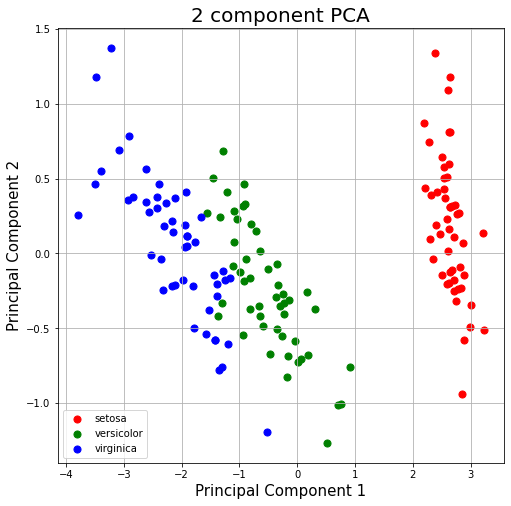

In [11]:
visual_np = PCA.visualize_2_dim()
visual_np

## b.	Vẽ explained variance graph với các chiều của dữ liệu

Explained variance: [92.46187232017269, 5.306648311706791, 1.7102609807929758, 0.5212183873275416]


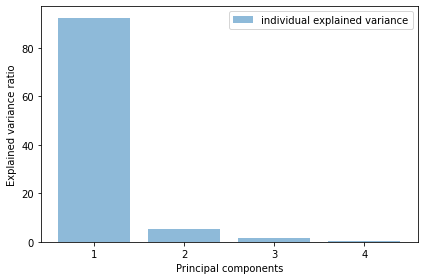

In [12]:
PCA.explained_variance()

# 4.	Thử dùng bài 3 với thuật toán PCA trong sklearn, so sánh kết quả

In [13]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [14]:
df.drop(columns=["target"], inplace=True)

In [15]:
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
# scale mean into 0

In [17]:
df = df - np.mean(df, axis = 0)
df

,sepal length,sepal width,petal length,petal width
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667
...,...,...,...,...
145,0.856667,-0.054,1.441333,1.101333
146,0.456667,-0.554,1.241333,0.701333
147,0.656667,-0.054,1.441333,0.801333
148,0.356667,0.346,1.641333,1.101333


In [18]:
# check whether mean = 0

In [19]:
df.mean(axis = 0)

sepal length   -1.125026e-15
sepal width    -6.750156e-16
petal length   -3.238891e-15
petal width    -6.069219e-16
dtype: float64

In [20]:
# using sklearn

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', "3", "4"])

In [22]:
# add target variable

In [23]:
principalDf["target"] = y

In [24]:
principalDf

,principal component 1,principal component 2,3,4,target
0,-2.684207,0.326607,-0.021512,0.001006,0
1,-2.715391,-0.169557,-0.203521,0.099602,0
2,-2.889820,-0.137346,0.024709,0.019305,0
3,-2.746437,-0.311124,0.037672,-0.075955,0
4,-2.728593,0.333925,0.096230,-0.063129,0
...,...,...,...,...,...
145,1.944017,0.187415,0.179303,0.425082,2
146,1.525664,-0.375021,-0.120636,0.255723,2
147,1.764046,0.078519,0.130784,0.136295,2
148,1.901629,0.115877,0.722874,0.040873,2


In [25]:
# visualize

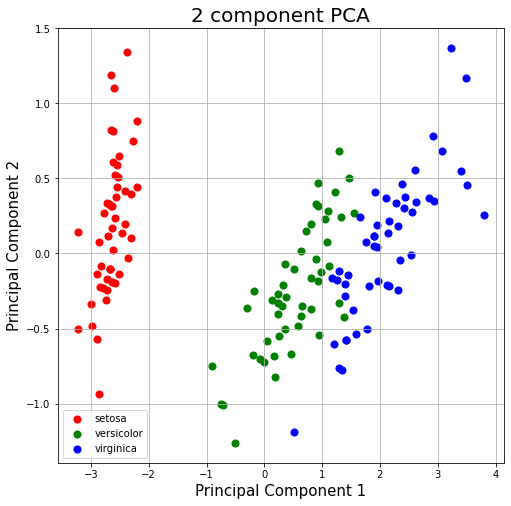

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
legends = ["setosa", "versicolor", "virginica"]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(legends)
ax.grid()

numpy implementation visualization:
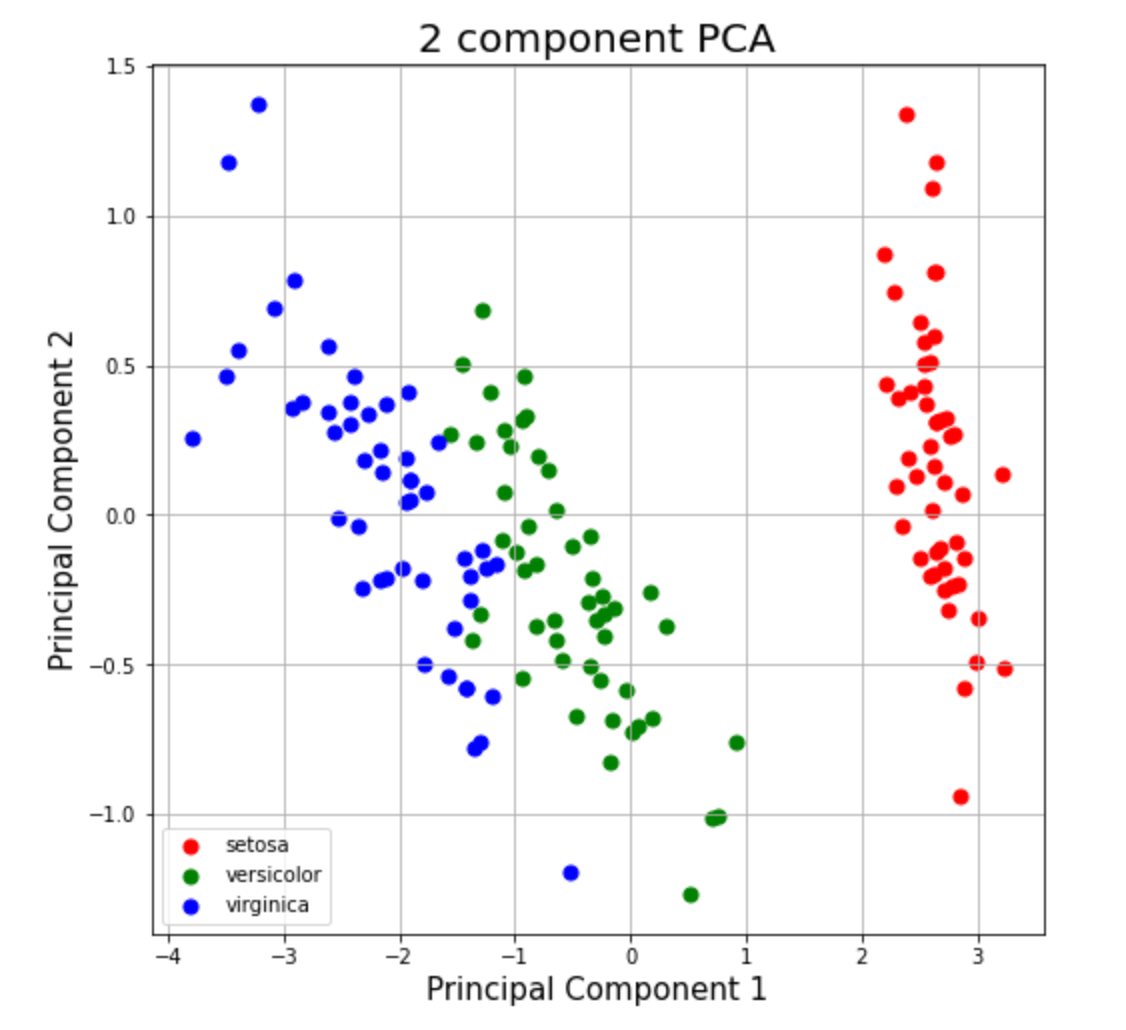

## So sánh kết quả:
Kết quả cho thấy, dấu của các các giá trị trong Principal Component 1 đang ngược nhau trong numpy implementation với sklearn. Lý do là vì:

**Trong sklearn, sau khi tính eigenvalues và eigenvectors, đối với mỗi eigenvector, nếu phần tử lớn nhất khi giá trị tuyệt đối có giá trị thực dương thì nó không có gì thay đổi, nhưng ngược lại, nó sẽ đổi dấu của eigenvector thànnh -eigenvector và eigenvalue thành -eigenvalue.** Mục đích là để đảm bảo mỗi lần perform sẽ cho ra kết quả không đổi với cùng 1 X